In [1]:
# xmlrpc_client.ipynb

import xmlrpc.client 
import pickle
import pandas as pd

server = xmlrpc.client.ServerProxy("http://localhost:8073")



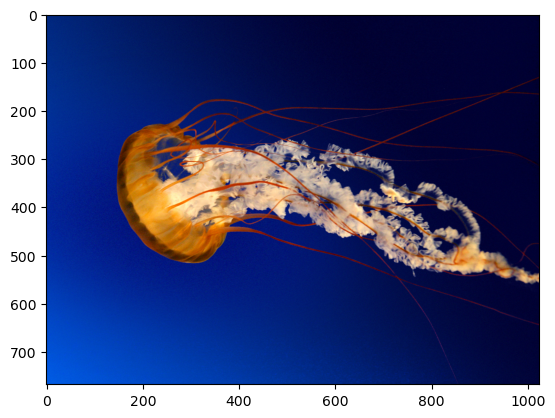

In [2]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение

import xmlrpc.client

# Режим отображения внутри ноутбука
%matplotlib inline
gray()

img = Image.open('Jellyfish.jpg')

img_arr = array(img)

# Исходное изображение
imshow(img_arr)

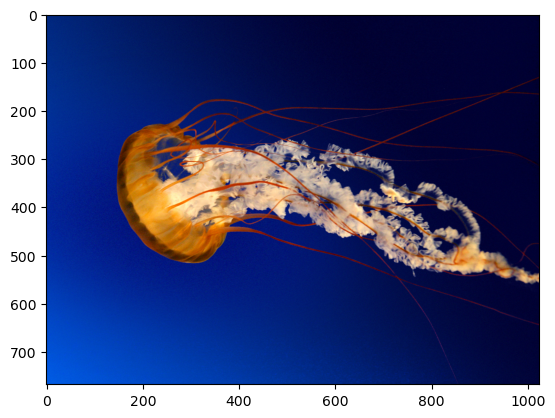

In [3]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = xmlrpc.client.Binary(pimg)

img_bin2 = server.send_back_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возврата с сервера
imshow(img_arr2)

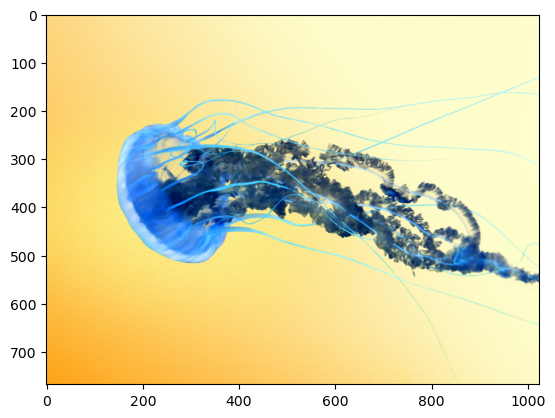

In [4]:

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = server.send_back_inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)

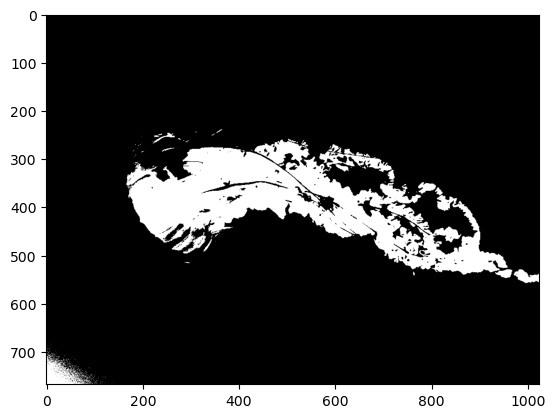

In [5]:
# Бинаризация изображения через сервер
def bin_im(img_arr_b):
    pimg = pickle.dumps(img_arr_b)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = server.send_back_bin(img_bin, 100)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_bn = bin_im(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_bn)

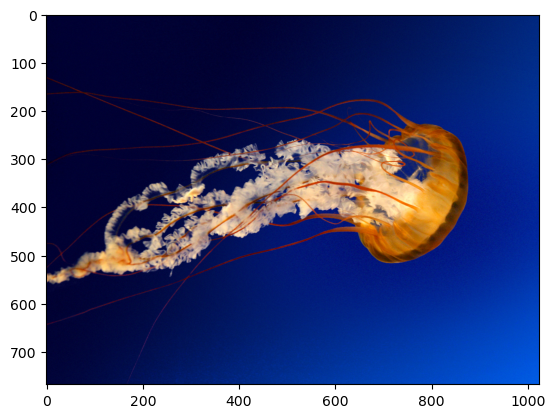

In [6]:
#  Вертикальный разворот изображения через сервер
def turn_v(img_arr_turn):
    pimg = pickle.dumps(img_arr_turn)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = server.send_back_vturn(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_turnv = turn_v(img_arr)

# Изображение с разворотом
imshow(img_arr_turnv)

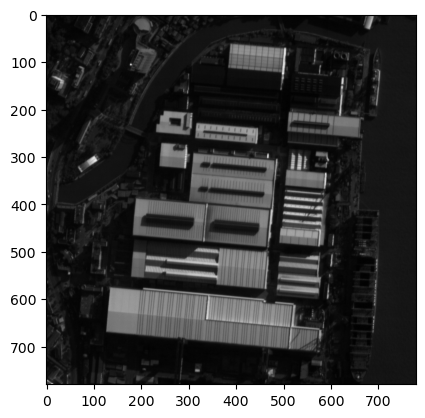

In [7]:
# Режим отображения внутри ноутбука
%matplotlib inline

img2 = Image.open('11.bmp')

img2_arr = array(img2)

# Исходное изображение
#imshow(img2_arr, cmap = "gray")
imshow(img2_arr)

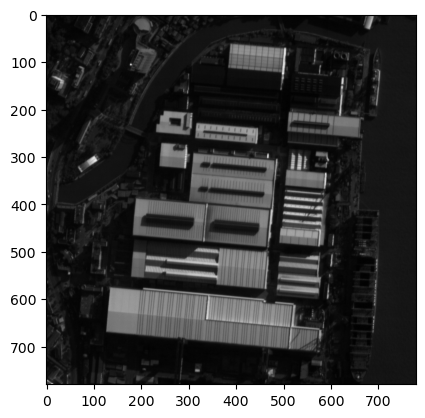

In [8]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg2 = pickle.dumps(img2_arr) # универсально

img2_bin = xmlrpc.client.Binary(pimg2)

img2_bin2 = server.send_back_binary(img2_bin)

#img_arr2 = np.loads(img_bin2.data)
img2_arr2 = pickle.loads(img2_bin2.data) # универсально

# Изображение после возврата с сервера
imshow(img2_arr2, cmap = "gray")

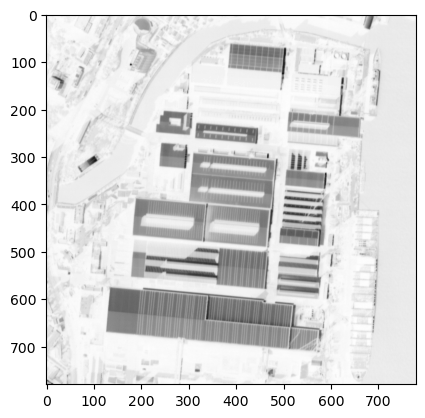

In [9]:
# Инверсия монохромного изображения через сервер
def inv_color(img_2arr_in):
    pimg2 = pickle.dumps(img_2arr_in)
    img2_bin = xmlrpc.client.Binary(pimg2)
    
    img2_bin2 = server.send_back_inversion(img2_bin)
    
    img2_arr_out = pickle.loads(img2_bin2.data)
    return img2_arr_out

img2_arr_inv = inv_color(img2_arr)

# Монохромное изображение с инверсией цвета
imshow(img2_arr_inv, cmap = "gray")

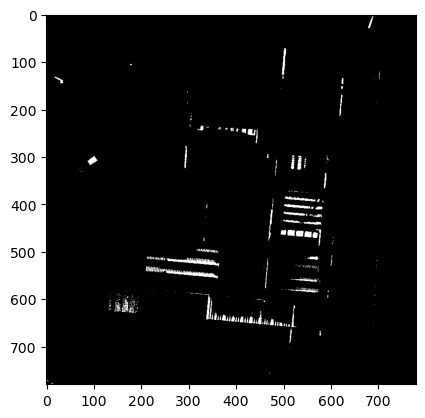

In [10]:
# Бинаризация изображения через сервер
def bin_im(img_2arr_b):
    pimg = pickle.dumps(img_2arr_b)
    img2_bin = xmlrpc.client.Binary(pimg)
    
    img2_bin2 = server.send_back_bin(img2_bin, 125)
    
    img2_arr_out = pickle.loads(img2_bin2.data)
    return img2_arr_out

img2_arr_bn = bin_im(img2_arr)

# Изображение c бинаризацией
imshow(img2_arr_bn, cmap = "gray")

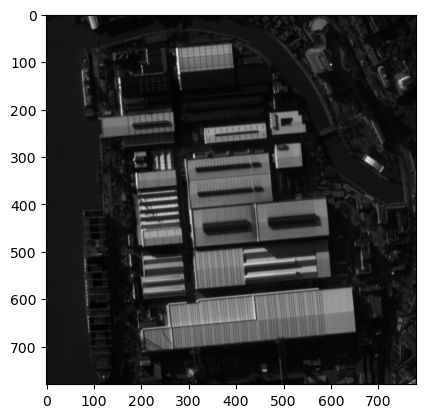

In [11]:
#  Вертикальный разворот изображения через сервер
def turn_v(img_2arr_turn):
    pimg = pickle.dumps(img_2arr_turn)
    img2_bin = xmlrpc.client.Binary(pimg)
    
    img2_bin2 = server.send_back_vturn(img2_bin)
    
    img2_arr_out = pickle.loads(img2_bin2.data)
    return img2_arr_out

img2_arr_turnv = turn_v(img2_arr)

# Изображение с разворотом
imshow(img2_arr_turnv, cmap = "gray")

In [12]:
print(server.black_list_check('Петров','Петр','Петрович','07.08.1985'))
print(server.black_list_check('Примеров','Василий','Иванович','05.09.2000'))
print(server.black_list_check('Петров','Иван','Петрович','07.08.1985'))


['Петров', 'Петр', 'Петрович', '07.08.1985: bad_boy']
['Примеров', 'Василий', 'Иванович', '05.09.2000: good_boy']
['Петров', 'Иван', 'Петрович', '07.08.1985: good_boy']


In [13]:
server = xmlrpc.client.ServerProxy("http://localhost:8072")
print("log: ", server.get_log_event('send_back_inversion'))
print("\n")
print("log: ", server.get_log_datetime('2023-11-22 00:00:00', '2023-12-30 00:00:00'))
print("\n")
print("log: ", server.get_log_duration(12, 15))


log:  [[4, 'send_back_inversion', '2023-11-30 13:11:40', '14'], [10, 'send_back_inversion', '2023-11-30 13:14:05', '14'], [14, 'send_back_inversion', '2023-11-30 13:15:00', '3'], [22, 'send_back_inversion', '2023-12-05 13:43:22', '14'], [26, 'send_back_inversion', '2023-12-05 13:45:56', '15'], [28, 'send_back_inversion', '2023-12-05 13:46:26', '15'], [32, 'send_back_inversion', '2023-12-05 19:11:50', '23'], [38, 'send_back_inversion', '2023-12-06 13:27:18', '15'], [39, 'send_back_inversion', '2023-12-06 13:27:41', '16'], [41, 'send_back_inversion', '2023-12-06 13:37:08', '16'], [45, 'send_back_inversion', '2023-12-06 13:38:18', '3'], [52, 'send_back_inversion', '2023-12-06 13:45:02', '15'], [56, 'send_back_inversion', '2023-12-06 13:46:49', '3']]


log:  [[1, 'send_back_binary', '2023-11-30 13:08:15', '0'], [2, 'send_back_binary', '2023-11-30 13:09:58', '0'], [3, 'send_back_binary', '2023-11-30 13:11:35', '0'], [4, 'send_back_inversion', '2023-11-30 13:11:40', '14'], [5, 'send_back_bin